# 实现显示单省份，或者多省份的地图

In [40]:
import numpy as np  # 调用numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  ###防止无法显示中文并设置黑体
plt.rcParams['axes.unicode_minus'] = False  ###用来正常显示负号

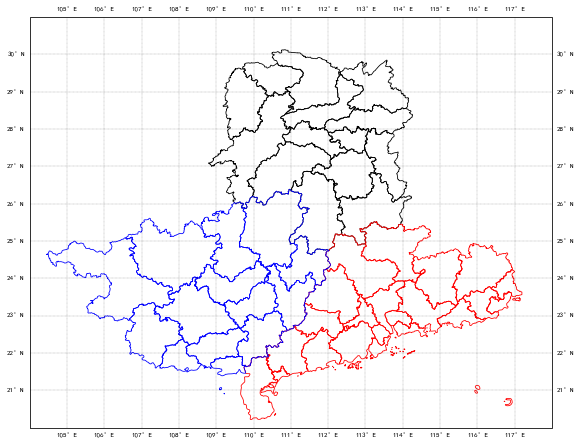

In [43]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(9, 6))
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})
# 经纬度格式，把0经度设置不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.add_geometries(Reader('D:\\maplist\\province\\430000_full.shp').geometries(), ccrs.PlateCarree(),
                  facecolor='none', edgecolor='k', linewidth=0.8)##湖南
ax.add_geometries(Reader('D:\\maplist\\province\\440000_full.shp').geometries(), ccrs.PlateCarree(),
                  facecolor='none', edgecolor='r', linewidth=0.8)##广东
ax.add_geometries(Reader('D:\\maplist\\province\\450000_full.shp').geometries(), ccrs.PlateCarree(),
                  facecolor='none', edgecolor='b', linewidth=0.8)##广西
tick = ax.gridlines(draw_labels=True, linestyle=':', linewidth=0.3, x_inline=False, y_inline=False, color='k')
tick.top_labels = True  ##打开上面的经纬度标签
tick.right_labels = True ###打开右边
tick.xformatter = LONGITUDE_FORMATTER
tick.yformatter = LATITUDE_FORMATTER
tick.xlocator = mticker.FixedLocator(np.arange(104, 118, 1))
tick.ylocator = mticker.FixedLocator(np.arange(20, 31, 1))
tick.xlabel_style = {'size': 7}
tick.ylabel_style = {'size': 7}
ax.set_extent([104,118,20,31],ccrs.PlateCarree())
##添加特征
# ax.add_feature()
plt.grid(visible=False)
plt.tight_layout()
plt.savefig('D:\\python\\多省份组合图.png')
plt.show()

In [42]:
help(ax.add_feature)

Help on method add_feature in module cartopy.mpl.geoaxes:

add_feature(feature, **kwargs) method of cartopy.mpl.geoaxes.GeoAxesSubplot instance
    Add the given :class:`~cartopy.feature.Feature` instance to the axes.
    
    Parameters
    ----------
    feature
        An instance of :class:`~cartopy.feature.Feature`.
    
    Returns
    -------
    A :class:`cartopy.mpl.feature_artist.FeatureArtist` instance
        The instance responsible for drawing the feature.
    
    Note
    ----
        Matplotlib keyword arguments can be used when drawing the feature.
        This allows standard Matplotlib control over aspects such as
        'facecolor', 'alpha', etc.

